In [246]:
pip install plotly_express

Note: you may need to restart the kernel to use updated packages.


In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go

# Comenzamos a ver el dataset

### Objetivo: Predecir la autonomía (KMS) dependiendo del clima a partir de unos parametros dados

In [248]:
data = pd.read_csv('evdataset.csv')

In [249]:
data.shape

(194, 27)

In [250]:
data.head(3)

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4


In [251]:
# Vemos la cantidad de valores nulos
data.isnull().sum()

id                             0
Make                           0
link                           0
City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Length                         0
Width                          0
Height                         0
Wheelbase                      0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Seats                          0
dtype: int64

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Make                         194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [253]:
data['Make'].unique()

array(['Genesis', 'Mercedes', 'Porsche', 'BMW', 'Volkswagen', 'CUPRA',
       'Skoda', 'MG', 'Volvo', 'Fiat', 'Smart', 'Hyundai', 'Peugeot',
       'Citroen', 'Audi', 'Polestar', 'Toyota', 'Kia', 'DS', 'Ford',
       'Honda', 'JAC', 'Nissan', 'Renault', 'Opel', 'Hongqi', 'Lexus',
       'Dacia', 'Mazda', 'Seres', 'Tesla', 'Jaguar', 'Mini', 'Subaru'],
      dtype=object)

In [254]:
data['Make'].value_counts()

Mercedes      24
Porsche       18
Audi          16
Volkswagen    13
Peugeot       12
Citroen       11
Toyota         8
BMW            8
MG             8
Fiat           8
Ford           7
Kia            6
Opel           6
Hyundai        5
Renault        5
Skoda          5
Tesla          4
Genesis        4
Volvo          4
CUPRA          4
Polestar       2
Honda          2
Smart          2
Hongqi         2
DS             1
JAC            1
Nissan         1
Lexus          1
Dacia          1
Mazda          1
Seres          1
Jaguar         1
Mini           1
Subaru         1
Name: Make, dtype: int64

In [255]:
data.columns

Index(['id', 'Make', 'link', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather',
       'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats'],
      dtype='object')

### Creamos un dataframe para explicar cada variable

In [256]:
variables = [
    {'id': 'Nº de referencia', 'Make': 'Empresa fabricante', 'City - Cold Weather': 'KMS de autonomía en ciudad con frío','Highway - Cold Weather': 'KMS de autonomía en autopista con frío','Combined - Cold Weather': 'KMS de autonomía en combinado con frío', 'City - Mild Weather': 'KMS de autonomía en ciudad con calor','Highway - Mild Weather': 'KMS de autonomía en autopista con calor','Combined - Mild Weather': 'KMS de autonomía en combinado con calor','Acceleration 0 - 100 km/h' : 'Segundos de aceleración de 0 a 100 km/h','Top Speed':'Velocidad Máxima','Electric Range':'Autonomía eléctrica según fabricante','Total Power':'Autonomía a velocidad máxima','Total Torque':'Fuerza del vehículo','Drive':'Tipo de tracción (Delantera:1)(Trasera:2)(4X4:3)','Battery Capacity':'KW de capacidad de carga','Charge Power':'KW de potencia de carga','Charge speed':'KMs de autonomía tras una hora de carga','Fastcharge Speed':'KMs de autonomía tras una hora de carga rápida','Length':'Longitud del vehículo','Width':'Anchura del vehículo','Height':'Altura del vehículo','Wheelbase':'Distancia entre los ejes','Gross Vehicle Weight':'Peso bruto del vehículo','Max. Payload':'Carga máxima del vehículo','Cargo Volume':'Volumen de carga','Seats':'Nº de asientos'}
,]

dfnuevo = pd.DataFrame(variables)

dfnuevo=dfnuevo.set_index('id')

In [257]:
dfnuevo.to_csv('dfnuevo.csv')


### Vemos las correlaciones entre variables

C:\Users\Nacho\AppData\Local\Temp\ipykernel_8248\2194189982.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Nacho\AppData\Local\Temp\ipykernel_8248\2194189982.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



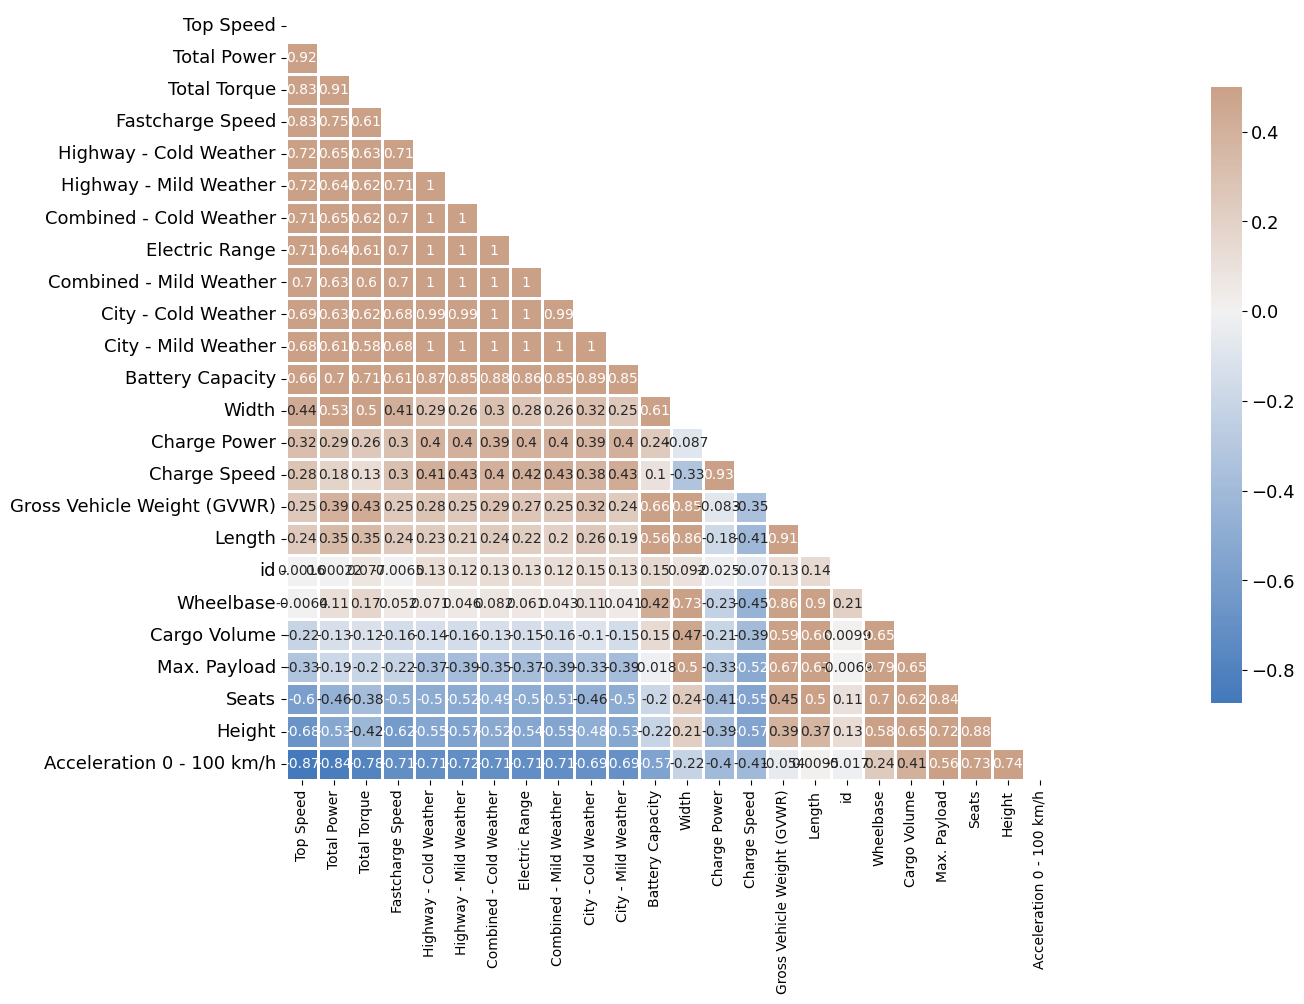

In [258]:
corr = data.corr(method = 'pearson').sort_values(by = 'Top Speed', axis = 0, ascending = False).sort_values(by = 'Top Speed', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40,10))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 1112, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
corr = sns.heatmap(corr.iloc[0:50,0:50], mask=mask[0:50,0:50], cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=2, cbar_kws={"shrink": .8}, annot = True)

plt.savefig('corr.png')

## Como tenemos una correlación tan fuerte entre 'Electric Range' y los tipos de conducción según el clima, podemos proseguir

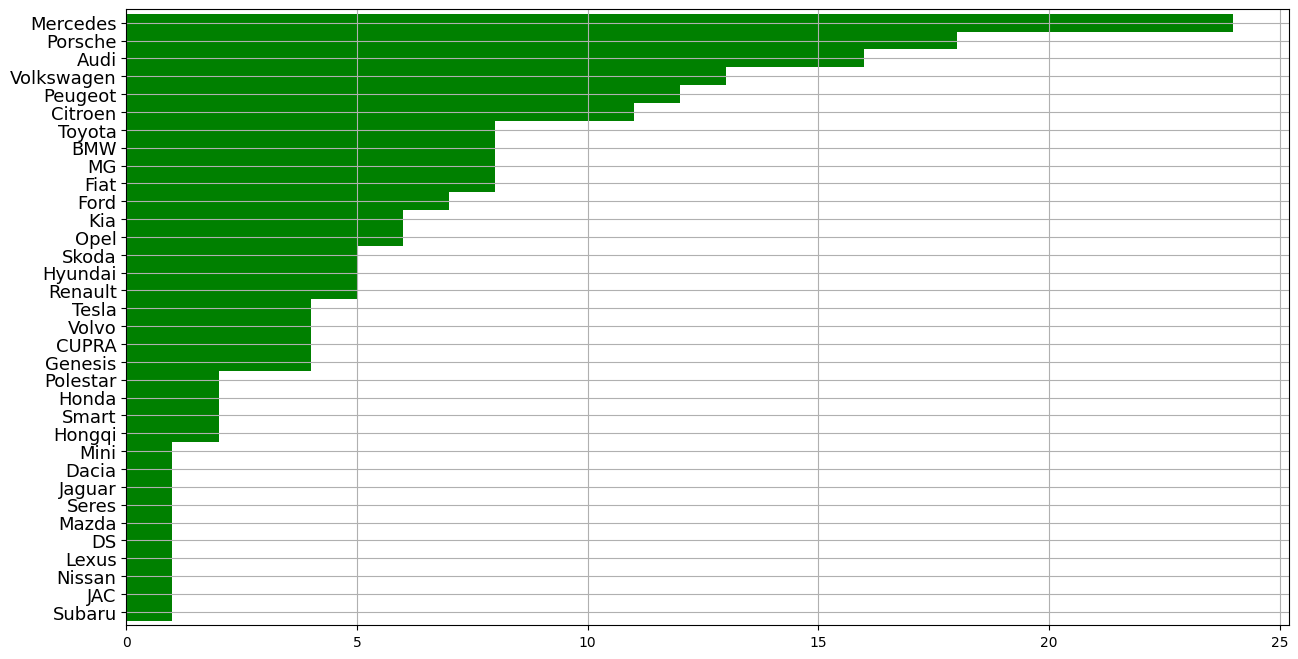

In [259]:
ma=data['Make'].value_counts()
ma = ma.sort_values()
ma.plot(kind='barh',stacked=True, color = ['g'],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.savefig('ma.png')

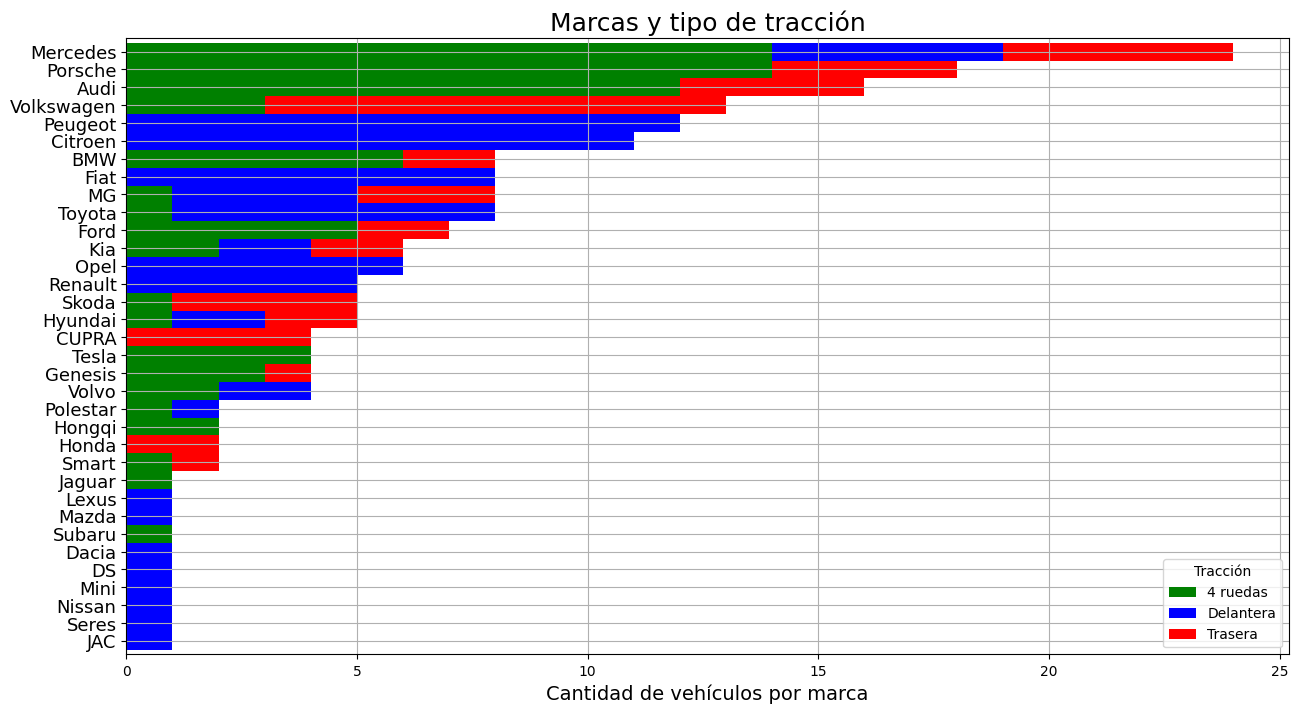

In [260]:
marca = data.groupby(['Make','Drive']).Drive.count()
marca = marca.unstack()
marca['total'] = marca['AWD'].fillna(0) + marca['Front'].fillna(0) + marca['Rear'].fillna(0)
marca = marca.sort_values(by=['total'])
marca = marca.drop(['total'],axis=1)



marca.plot(kind='barh',stacked=True, color = ["g","b","r"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Marcas y tipo de tracción', fontsize=18)
plt.legend(title='Tracción',labels=['4 ruedas', 'Delantera', 'Trasera'])
plt.xlabel('Cantidad de vehículos por marca', fontsize=14)
plt.ylabel("")
plt.rc('ytick', labelsize=13)
plt.savefig('matt.png')

In [261]:
# Vemos la media de autonomía según la marca
data3 = data.groupby('Make')['Electric Range'].mean().sort_values(ascending=False)
me = px.scatter(data3)
me.update_traces(marker=dict(
        color='green'),showlegend=False)
me.update_xaxes(tickangle=90)

In [262]:
me.write_html("me.html")

In [263]:
#top 10 marcas por autonomía
data2 = data.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(n=10) 
data2
fig = go.Figure(data =[go.Pie (labels=data2.index.values, values= data2,textinfo='label+percent')])
fig.show()
fig.write_html("marcauto.html")

In [264]:
# Distribución de coches según la tracción
data1 = data['Drive'].value_counts()
data1
#graficamos
fig = go.Figure(data =[go.Pie (labels=data1.index.values, values= data1,textinfo='label+percent')])
fig.update_layout(showlegend=False)
fig.show()
fig.write_html("trac.html")

In [265]:
fig = px.scatter_matrix (data, dimensions=['Electric Range','Drive'], color ='Make') 
fig.show()

c:\Users\Nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [266]:
fig.write_html(r"auton.html")

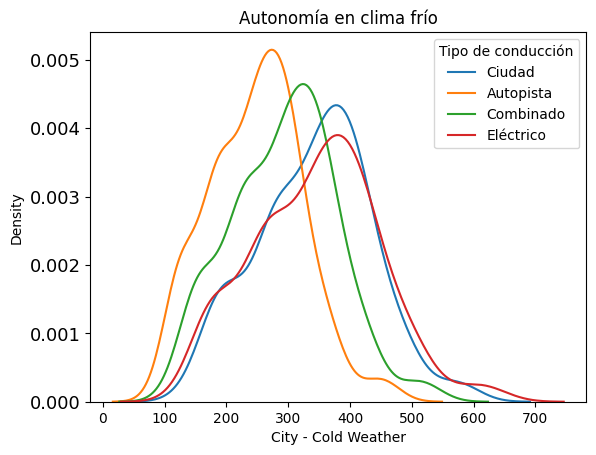

In [267]:
sns.kdeplot(data['City - Cold Weather'])
sns.kdeplot(data['Highway - Cold Weather'])
sns.kdeplot(data['Combined - Cold Weather'])
sns.kdeplot(data['Electric Range'])
plt.title('Autonomía en clima frío')
plt.legend(title='Tipo de conducción',labels=['Ciudad', 'Autopista', 'Combinado', 'Eléctrico'])
plt.savefig('frio.png')

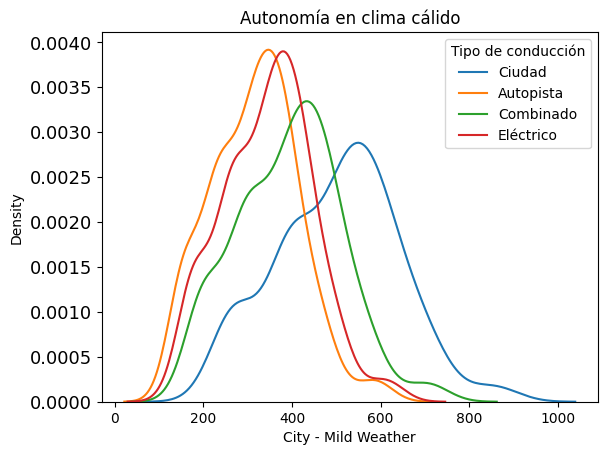

In [268]:
sns.kdeplot(data['City - Mild Weather'])
sns.kdeplot(data['Highway - Mild Weather'])
sns.kdeplot(data['Combined - Mild Weather'])
sns.kdeplot(data['Electric Range'])
plt.title('Autonomía en clima cálido')
plt.legend(title='Tipo de conducción', labels=['Ciudad', 'Autopista', 'Combinado', 'Eléctrico'])
plt.savefig('caliente.png')


# Sustituimos las columnas de clima y tipo de conducción por la media de los tipos de conducción agrupados en clima

In [269]:
data['Range Cold Weather'] = (data['City - Cold Weather']+data['Highway - Cold Weather']+data['Combined - Cold Weather'])/3

In [270]:
data['Range Hot Weather'] = (data['City - Mild Weather']+data['Highway - Mild Weather']+data['Combined - Mild Weather'])/3

In [271]:
data.head(1)

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats,Range Cold Weather,Range Hot Weather
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,4515,1890,1580,2900,2495,595,432,5,331.666667,458.333333


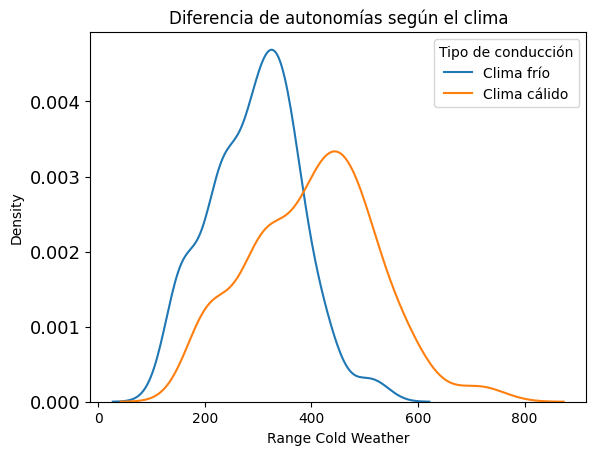

In [272]:
sns.kdeplot(data['Range Cold Weather'])
sns.kdeplot(data['Range Hot Weather'])
plt.title('Diferencia de autonomías según el clima')
plt.legend(title='Tipo de conducción', labels=['Clima frío', 'Clima cálido'])
plt.savefig('difr.png')

In [273]:
# Eliminamos las columnas que nos sobran 
df = data.drop(['City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather','Combined - Mild Weather','link'],axis=1)

In [274]:
# Redondeamos las columnas objetivo
df = df.round({'Range Cold Weather':2,'Range Hot Weather':2})

In [275]:
# Sustituimos las palabras de tipos de tracción por números
df['Drive'] = df['Drive'].replace({'Front':1, 'Rear':2, 'AWD':3})
df['Drive'] = df['Drive'].astype(float)

# Utilizamos One Hot Encoder para cambiar a tipo float las marcas de los coches

In [276]:
from sklearn.preprocessing import OneHotEncoder #Librería
obj_vars = df.select_dtypes(include = 'object').columns #Columnas categóricas
encoder = OneHotEncoder() #Encoder
for var in obj_vars: #Entrenamos el encoder en cada variable
  encoder.fit(df.loc[:,[var]])
  enc_data = pd.DataFrame(encoder.transform(df.loc[:,[var]]).toarray(), columns = [var + '_' + typevar for typevar in encoder.categories_[0].tolist()], index = df.index)
  df = pd.concat([df, enc_data], axis = 1)
  df = df.drop([var], axis = 1)

# Machine Learning

In [277]:
df = df.reset_index()
df = df.drop('index', axis = 1)

In [278]:
df2 = df

In [279]:
# Vemos un ejemplo de los coches
pers1 = df2.sample().transpose()
pers1.to_csv('pers1.csv')

In [280]:
X, y = df2.loc[:, ~df.columns.isin(['Range Cold Weather'])], df.loc[:, 'Range Cold Weather']

In [281]:
X = X.drop(columns=['Range Hot Weather'])

In [282]:
X.columns

Index(['id', 'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats', 'Make_Audi', 'Make_BMW', 'Make_CUPRA',
       'Make_Citroen', 'Make_DS', 'Make_Dacia', 'Make_Fiat', 'Make_Ford',
       'Make_Genesis', 'Make_Honda', 'Make_Hongqi', 'Make_Hyundai', 'Make_JAC',
       'Make_Jaguar', 'Make_Kia', 'Make_Lexus', 'Make_MG', 'Make_Mazda',
       'Make_Mercedes', 'Make_Mini', 'Make_Nissan', 'Make_Opel',
       'Make_Peugeot', 'Make_Polestar', 'Make_Porsche', 'Make_Renault',
       'Make_Seres', 'Make_Skoda', 'Make_Smart', 'Make_Subaru', 'Make_Tesla',
       'Make_Toyota', 'Make_Volkswagen', 'Make_Volvo'],
      dtype='object')

# Modelización

In [283]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

#Partición de los datos
from sklearn.model_selection import KFold

#Escalado de datos
from sklearn.preprocessing import StandardScaler

#Modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


#Escalado de datos         //El escalado de datos, ahora mismo, no hace falta.
scaler = StandardScaler()
scaler.fit(df2)
X_train = scaler.transform(df2.iloc[X_train.index,:])
X_test = scaler.transform(df2.iloc[X_test.index,:])


#Partición de datos de entrenamiento para analizar modelos
n_splits = 8
kf = KFold(n_splits = n_splits)

#Diccionario de modelos
models={'OLS': LinearRegression(),
        'SVR': SVR(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'RandomForest': RandomForestRegressor(),
        'XGB': GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
       }


#Bucle
for name, model in models.items():
  print('Probamos modelo {}:'.format(name))
  rsme = []
  for train_idx, test_idx in kf.split(X_train, y_train):
    model.fit(X_train[train_idx,:], y_train.values[train_idx])
    y_pred = model.predict(X_train[test_idx,:])
    rsme.append(np.sqrt(sum((y_train.iloc[test_idx]-y_pred)**2)))
  print('El RMSE medio de las estimaciones es: {:.3f}'.format(np.mean(rsme)))

Probamos modelo OLS:
El RMSE medio de las estimaciones es: 0.000
Probamos modelo SVR:
El RMSE medio de las estimaciones es: 329.571
Probamos modelo Ridge:
El RMSE medio de las estimaciones es: 6.649
Probamos modelo Lasso:
El RMSE medio de las estimaciones es: 5.995
Probamos modelo ElasticNet:
El RMSE medio de las estimaciones es: 62.122
Probamos modelo RandomForest:
El RMSE medio de las estimaciones es: 22.598
Probamos modelo XGB:
El RMSE medio de las estimaciones es: 66.049


In [285]:
# Predecir la autonomía según el X_test
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(X_train,y_train)
clf.predict(X_test)

array([220.  , 380.  , 233.33, 431.67, 330.  , 513.33, 311.67, 385.  ,
       255.  , 375.  , 230.  , 325.  , 295.  , 340.  , 243.33, 361.67,
       133.33, 286.67, 343.33, 151.67, 318.33, 376.67, 328.33, 230.  ,
       330.  , 226.67, 233.33, 475.  , 325.  , 345.  , 346.67, 156.67,
       200.  , 315.  , 216.67, 233.33, 441.67, 156.67, 156.67])

In [286]:
y_test

31     220.00
4      380.00
80     233.33
165    431.67
122    330.00
178    513.33
81     311.67
177    385.00
88     255.00
140    375.00
162    230.00
20     325.00
144    295.00
90     340.00
100    243.33
19     361.67
121    133.33
37     286.67
141    343.33
176    151.67
79     318.33
112    376.67
26     328.33
156    230.00
148    330.00
41     226.67
166    233.33
50     475.00
168    325.00
107    345.00
136    346.67
62     156.67
114    200.00
172    315.00
146    216.67
95     233.33
108    441.67
33     156.67
23     156.67
Name: Range Cold Weather, dtype: float64

In [300]:
def change_column_names(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df
change_column_names(df2)
df2.columns

Index(['id', 'Acceleration_0_-_100_km/h', 'Top_Speed', 'Electric_Range',
       'Total_Power', 'Total_Torque', 'Drive', 'Battery_Capacity',
       'Charge_Power', 'Charge_Speed', 'Fastcharge_Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross_Vehicle_Weight_(GVWR)', 'Max._Payload',
       'Cargo_Volume', 'Seats', 'Range_Cold_Weather', 'Range_Hot_Weather',
       'Make_Audi', 'Make_BMW', 'Make_CUPRA', 'Make_Citroen', 'Make_DS',
       'Make_Dacia', 'Make_Fiat', 'Make_Ford', 'Make_Genesis', 'Make_Honda',
       'Make_Hongqi', 'Make_Hyundai', 'Make_JAC', 'Make_Jaguar', 'Make_Kia',
       'Make_Lexus', 'Make_MG', 'Make_Mazda', 'Make_Mercedes', 'Make_Mini',
       'Make_Nissan', 'Make_Opel', 'Make_Peugeot', 'Make_Polestar',
       'Make_Porsche', 'Make_Renault', 'Make_Seres', 'Make_Skoda',
       'Make_Smart', 'Make_Subaru', 'Make_Tesla', 'Make_Toyota',
       'Make_Volkswagen', 'Make_Volvo'],
      dtype='object')

In [290]:
df.columns

Index(['id', 'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats', 'Range Cold Weather', 'Range Hot Weather',
       'Make_Audi', 'Make_BMW', 'Make_CUPRA', 'Make_Citroen', 'Make_DS',
       'Make_Dacia', 'Make_Fiat', 'Make_Ford', 'Make_Genesis', 'Make_Honda',
       'Make_Hongqi', 'Make_Hyundai', 'Make_JAC', 'Make_Jaguar', 'Make_Kia',
       'Make_Lexus', 'Make_MG', 'Make_Mazda', 'Make_Mercedes', 'Make_Mini',
       'Make_Nissan', 'Make_Opel', 'Make_Peugeot', 'Make_Polestar',
       'Make_Porsche', 'Make_Renault', 'Make_Seres', 'Make_Skoda',
       'Make_Smart', 'Make_Subaru', 'Make_Tesla', 'Make_Toyota',
       'Make_Volkswagen', 'Make_Volvo'],
      dtype='object')

In [291]:
# Guardamos el modelo
pickle.dump(clf, open('Frio.pkl', 'wb'))

### Hemos comprobado que para la variable objetivo 'Range Cold Weather' tenemos un error de 0.00 con lo cual la predicción va a ser perfecta. Ahora es hora de hacer lo mismo pero con 'Range Hot Weather'

In [292]:
df3 = df

In [293]:
X1, y1 = df3.loc[:, ~df.columns.isin(['Range Hot Weather'])], df.loc[:, 'Range Hot Weather']

In [294]:
X1 = X1.drop(columns=['Range Cold Weather'])

In [295]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.2, random_state=123)

#Partición de los datos
from sklearn.model_selection import KFold

#Escalado de datos
from sklearn.preprocessing import StandardScaler

#Modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


#Escalado de datos         //El escalado de datos, ahora mismo, no hace falta.
scaler = StandardScaler()
scaler.fit(df3)
X_train = scaler.transform(df3.iloc[X_train.index,:])
X_test = scaler.transform(df3.iloc[X_test.index,:])


#Partición de datos de entrenamiento para analizar modelos
n_splits = 8
kf = KFold(n_splits = n_splits)

#Diccionario de modelos
models={'OLS': LinearRegression(),
        'SVR': SVR(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'RandomForest': RandomForestRegressor(),
        'XGB': GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
       }


#Bucle
for name, model in models.items():
  print('Probamos modelo {}:'.format(name))
  rsme = []
  for train_idx, test_idx in kf.split(X_train, y_train):
    model.fit(X_train[train_idx,:], y_train.values[train_idx])
    y_pred = model.predict(X_train[test_idx,:])
    rsme.append(np.sqrt(sum((y_train.iloc[test_idx]-y_pred)**2)))
  print('El RMSE medio de las estimaciones es: {:.3f}'.format(np.mean(rsme)))

Probamos modelo OLS:
El RMSE medio de las estimaciones es: 0.000
Probamos modelo SVR:
El RMSE medio de las estimaciones es: 474.852
Probamos modelo Ridge:
El RMSE medio de las estimaciones es: 10.717
Probamos modelo Lasso:
El RMSE medio de las estimaciones es: 7.705
Probamos modelo ElasticNet:
El RMSE medio de las estimaciones es: 91.650
Probamos modelo RandomForest:
El RMSE medio de las estimaciones es: 27.752
Probamos modelo XGB:
El RMSE medio de las estimaciones es: 93.052


In [296]:
# Predecir la autonomía según el X_test
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(X_train,y_train)
clf.predict(X_test)

array([305.  , 531.67, 306.67, 591.67, 445.  , 715.  , 430.  , 541.67,
       355.  , 518.33, 301.67, 445.  , 411.67, 470.  , 326.67, 496.67,
       188.33, 393.33, 471.67, 216.67, 430.  , 528.33, 450.  , 301.67,
       443.33, 316.67, 306.67, 653.33, 435.  , 466.67, 476.67, 208.33,
       276.67, 431.67, 301.67, 306.67, 616.67, 208.33, 208.33])

In [297]:
y_test

31     305.00
4      531.67
80     306.67
165    591.67
122    445.00
178    715.00
81     430.00
177    541.67
88     355.00
140    518.33
162    301.67
20     445.00
144    411.67
90     470.00
100    326.67
19     496.67
121    188.33
37     393.33
141    471.67
176    216.67
79     430.00
112    528.33
26     450.00
156    301.67
148    443.33
41     316.67
166    306.67
50     653.33
168    435.00
107    466.67
136    476.67
62     208.33
114    276.67
172    431.67
146    301.67
95     306.67
108    616.67
33     208.33
23     208.33
Name: Range Hot Weather, dtype: float64

In [298]:
def change_column_names(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df
change_column_names(df3)
df3.columns

Index(['id', 'Acceleration_0_-_100_km/h', 'Top_Speed', 'Electric_Range',
       'Total_Power', 'Total_Torque', 'Drive', 'Battery_Capacity',
       'Charge_Power', 'Charge_Speed', 'Fastcharge_Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross_Vehicle_Weight_(GVWR)', 'Max._Payload',
       'Cargo_Volume', 'Seats', 'Range_Cold_Weather', 'Range_Hot_Weather',
       'Make_Audi', 'Make_BMW', 'Make_CUPRA', 'Make_Citroen', 'Make_DS',
       'Make_Dacia', 'Make_Fiat', 'Make_Ford', 'Make_Genesis', 'Make_Honda',
       'Make_Hongqi', 'Make_Hyundai', 'Make_JAC', 'Make_Jaguar', 'Make_Kia',
       'Make_Lexus', 'Make_MG', 'Make_Mazda', 'Make_Mercedes', 'Make_Mini',
       'Make_Nissan', 'Make_Opel', 'Make_Peugeot', 'Make_Polestar',
       'Make_Porsche', 'Make_Renault', 'Make_Seres', 'Make_Skoda',
       'Make_Smart', 'Make_Subaru', 'Make_Tesla', 'Make_Toyota',
       'Make_Volkswagen', 'Make_Volvo'],
      dtype='object')

In [299]:
# Guardamos el modelo
pickle.dump(clf, open('Caliente.pkl', 'wb'))

### Ya tenemos la predicción hecha para 'Range Hot Weather' con un error de 0.00, con lo cual también va a ser perfecta